# Numerical Integration by Arslan Memon

## Part 1: High-order Numerical Integration

For the first part of the project, we were required to create a composite numerical integration function with at least an order O($h^8$) convergence. I decided to use the composite Gaussian numerical integration formula with 5 nodes to accomplish this. First, I used the book to find the specific weights and nodes required for the 5 node Gaussian integration formula. Then I copied the Gauss method provided to us, and added variables for the nodes and weights I found in the book. In order to use this method, a change of integration bounds was required because the Gaussian quadrature method only works on the interval [-1,1]. This was a simple formula: multiply each node by the midpoint of each subinterval and add the midpoint to the result. For each subinterval, I multiplied each weight with its respective node and added these combinations together to the total. After adding all the subintervals, the final result was computed by multiplying the sums by half of the subinterval length.

The formula for convergence rate is 2n+2 using n+1 nodes. I expect my convergence to be O($h^{10}$) because I used 5 nodes. In order to test the convergence of my Gaussian quadrature method with 5 nodes, I copied the test_gauss file into test_int.cpp. I decreased the number of subintervals in the array because of the faster convergence rate of my method.
 

The following is the output of test_int.exe:


    True Integral = 2.3924089071413306e+01

     Gauss-5 approximation:
         n             R(f)            relerr    conv rate
      ---------------------------------------------------
           10  2.3883146134635268e+01  1.7e-03     ----
           20  2.3924023975577899e+01  2.7e-06   9.296834
           30  2.3924083981972299e+01  2.1e-07   6.285849
           40  2.3924089147196931e+01  3.2e-09   14.623925
           50  2.3924089075903385e+01  1.9e-10   12.664546
           60  2.3924089071979534e+01  2.4e-11   11.357016
           70  2.3924089071519383e+01  4.4e-12   10.864903
           80  2.3924089071439028e+01  1.1e-12   10.610476
      ---------------------------------------------------
As can be seen by the result, my integration method has a convergence rate that averages to 10. The reason it works so well is because of the specific nodes and weights used to approximate the integral. As can be seen by the data, the more subintervals used, the smaller the relative error gets. The estimate on the subintervals get better as they become smaller, so the limit as h goes to 0 would have no error, but would require more work.   


## Part 2: Adaptive Numerical Integration

For part 2, we were required to create an adaptive numerical integration function that provides a result with the desired accuracy, but doesn't do too much work. The goal was to get a |$I(f)-R_n<rtol*I(f)+atol|$, but  $R_{n+k}$ was used as an approximation of the true integral. This approximation works because of the rapid convergence of the five node Gaussian quadrature. We tested this function using the same f(x) evaluated from -3 to 5 as the test_int. This time, however, we had a set of atol and rtol that we used to evaluate the integral to a certain accuracy. I did some trial and error with my adaptive integration function to find out how to reduce the total number of subintervals used to get a result. I started by setting the initial number of subintervals to 8 and multiplying by a number based on rtol, which was wasteful because of the fact that if the tolerance was low, and I multiplied n by 8 each time, then the number of subintervals would reach over 400, even though only 70 were needed. I then decided to have my initial subintervals based on rtol as well and tested a range of subintervals before coming up with ones that use the least number of subintervals. I found that using 16, 36,and 64 initial subintervals for tolerances greater than or equal to $10^{-4}, 10^{-8}$, and $10^{-12}$ respectively produced the least number of Ntot on average. Also, as a result of the fast convergence, I decided to decrease k as rtol decreased, since I was starting with more subintervals initially.

I decided to use 4 iterations to determine if the function is a success. For every iteration that the accuracy was not met, I multiplied n based on rtol. I decided that for a larger rtol, the initial value of n is sufficiently small enough that multiplying n by 1.5 wouldn't affect Ntot alot. For smaller tolerances, the initial value of n is large to start with, so increasing n by n/8 should lead to an accurate approximation within a couple of intervals due to the high convergence rate of my numerical integration method. The approximation, number of subintervals for the approximation, and total number of subintervals used to find the approximation were than stored in variables that were passed in to the function.

The following is the output of test_adapt.exe:

True Integral = 2.3924089071413306e+01
     n    Ntot  rtol     atol     rtol |I(f)| + atol         |I(f)-R(f)|
  -----------------------------------------------------------------------------
     16    38  1.0e-02  1.0e-04  2.3934089071413306e-01   1.6113955327089258e-02
     24    92  1.0e-04  1.0e-06  2.3934089071413309e-03   1.1574344465969943e-05
     36    76  1.0e-06  1.0e-08  2.3934089071413305e-05   3.9390730677268948e-07
     45   170  1.0e-08  1.0e-10  2.3934089071413308e-07   1.6044552353378094e-08
     64   131  1.0e-10  1.0e-12  2.3934089071413306e-09   2.7908342303817335e-10
     81   443  1.0e-12  1.0e-14  2.3934089071413304e-11   2.2570390001419582e-11




As can be seen by n and Ntot, The minimum amount of work that needs to be done in order to get a desired approximation is a little over 2n. This is because of the fact that we also use n+k subintervals to approximate the true integral. My adaptive numerical integration gave the desired relative error, but for an rtol of 1e-12 and atol of 1e-14, it went through about 5 times as many subintervals just to get a n of 81, which seems to be wasteful considering that using 100 subintervals to start with would have required less work. However, an atol of 1e-14 and rtol of 1e-12, only takes twice as many intervals to find n with my method. The further n deviates from the initial n, the more work that is required by my method, which is to be expected.

### Part 3: Application

For part 3, we were to use the adaptive_int function to calculate the error function for carbon concentration in steel. I had to create two dummy variable ntot and n to put as a placeholder in the adaptive_int function, even though they weren't needed in part 3. The function was really simple to code because the result was just the adaptive_int from 0 to y of e$^{-x^2}$, where y=$xeo/sqrt(4tD(t))$ and D(t)=$e^{-8(10^4)/8.31T))}$, times 2/sqrt($\pi)$. Then, a carbon function was created and used the erf function to calculate the carbon concentration in the steel. It was simple as well because it was a function of x, in meters, time in seconds, and Temperature, in Kelvins. I created multiple variables for separate parts of the equation to make it easy to put everything together to determine the concentration. The initial carbon concentration, $C_0$ was .001 and the carbon concentration in gas, $C_S$ was .02. The final return value was calculated as  Cs-((Cs-c0)*erf(y,  rtol, atol)). 

To test this function, I created a file called test_carbon. First I created two matrices, t and T, to store the time and temperatures. The time matrix had six hundred evenly spaced nodes between 1 second and 48 hours (in seconds). The Temperature matrix had 400 evenly spaced nodes between 800 Kelvin and 1200 Kelvin. I created two more matrices that stored the carbon concentration of steel at 2mm and 4mm from the surface. I filled these matrices using the carbon function with parameter from Matrices t and T and rtol of $10^{-11}$ and atol of $10^{-14}$. Afterward, I created five more matrices that were to store the carbon concentrations of steel 2mm from the surface using the t matrix and temperatures of 800,900,1000,1100,and 1200 Kelvin. Then, I did the same thing for 4mm and stored the data to disk.

The following is the code for the plots of carbon concentration.


In [1]:
%pylab inline
T=loadtxt("Temp.txt");
t=loadtxt("time.txt");
C2mm=loadtxt("C2mm.txt");
C2mm_800K =loadtxt("C2mm_800K.txt");
C2mm_900K=loadtxt("C2mm_900K.txt");
C2mm_1000K=loadtxt("C2mm_1000K.txt");
C2mm_1100K=loadtxt("C2mm_1100K.txt");
C2mm_1200K=loadtxt("C2mm_1200K.txt");
C4mm=loadtxt("C4mm.txt");
C4mm_800K=loadtxt("C4mm_800K.txt");
C4mm_900K=loadtxt("C4mm_900K.txt");
C4mm_1000K=loadtxt("C4mm_1000K.txt");
C4mm_1100K=loadtxt("C4mm_1100K.txt");
C4mm_1200K=loadtxt("C4mm_1200K.txt");

Populating the interactive namespace from numpy and matplotlib


In [2]:
time_ticks =[]
x_ticks =[]
x_vals = linspace(0, 599, 7)
for x in xrange(0,7):
    x_ticks.append(round(x_vals[x]))
    time_ticks.append(round( t[round(x_vals[x])]/3600) )
temp_ticks = []
y_ticks = []
y_vals = linspace(0, 399, 5)
for x in xrange(0,5):
	y_ticks.append(round(y_vals[x], -1))
	temp_ticks.append(round(T[ y_vals[x] ], -1))

/Users/muhammadmemon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/muhammadmemon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


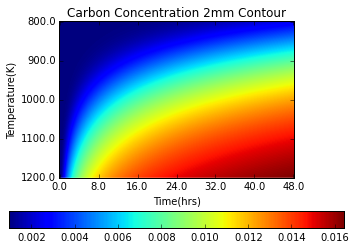

In [3]:
figure()
imshow(C2mm)
colorbar(orientation='horizontal')
title("Carbon Concentration 2mm Contour")
ax = subplot()
ax.set_xticks(x_ticks)      
ax.set_xticklabels(time_ticks) 
ax.set_yticks(y_ticks)         
ax.set_yticklabels(temp_ticks) 
xlabel('Time(hrs)')
ylabel('Temperature(K)')

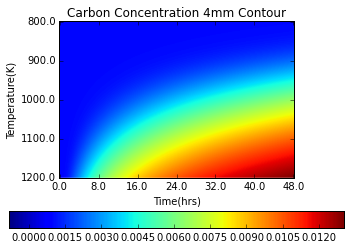

In [4]:
figure()
imshow(C4mm)
colorbar(orientation='horizontal')
title("Carbon Concentration 4mm Contour")
ax = subplot()
ax.set_xticks(x_ticks)         #positions of X
ax.set_xticklabels(time_ticks) #labels of X
ax.set_yticks(y_ticks)         #positions of Y
ax.set_yticklabels(temp_ticks) #
xlabel('Time(hrs)')
ylabel('Temperature(K)')

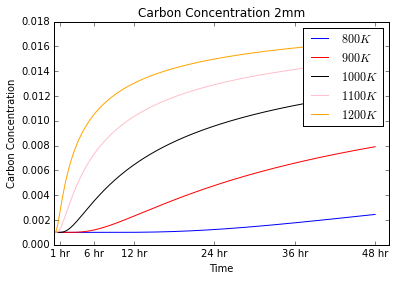

In [5]:
plot(t, C2mm_800K, 'b-',  label='$800K$')
plot(t, C2mm_900K, 'r-', label='$900K$')
plot(t, C2mm_1000K, 'k-',  label='$1000K$')
plot(t, C2mm_1100K, 'pink',label='$1100K$')
plot(t, C2mm_1200K, 'orange', label='$1200K$')
xticks( (1*3600, 6*3600, 12*3600, 24*3600, 36*3600, 48*3600),
                   ('1 hr', '6 hr', '12 hr', '24 hr', '36 hr', '48 hr') )
xlabel('Time')
ylabel('Carbon Concentration')
title("Carbon Concentration 2mm")
legend();

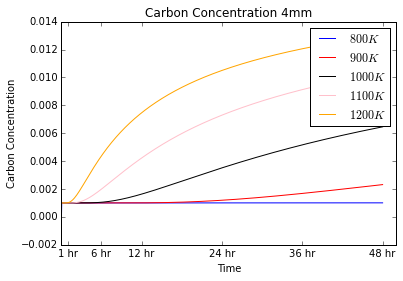

In [6]:
plot(t, C4mm_800K, 'b-',  label='$800K$')
plot(t, C4mm_900K, 'r-', label='$900K$')
plot(t, C4mm_1000K, 'k-',  label='$1000K$')
plot(t, C4mm_1100K, 'pink',label='$1100K$')
plot(t, C4mm_1200K, 'orange', label='$1200K$')
xticks( (1*3600, 6*3600, 12*3600, 24*3600, 36*3600, 48*3600),
                   ('1 hr', '6 hr', '12 hr', '24 hr', '36 hr', '48 hr') )
xlabel('Time')
ylabel('Carbon Concentration')
title("Carbon Concentration 4mm")
legend();

Starting with the contour plots, one can see that as time increase, so does the carbon concentration. This can be explained by the fact that as time goes to infinite, the y in the error function goes to 0 and results in a zero integral, which means the concentration equals $C_S$, which is the highest the carbon concentration can get. As T increases, D(T) gets closer to 6.2x$10^{-7}$ which is the max d(t) can be, which also results in a lower integral, thus increasing the carbon concentration. This is also seen in the contour plots the highest concentrations of carbon happen when T and t are both high. As x increases, the carbon concentration seems to take more time and heat to increase, which is seen by the huge blue area in the 4mm contour plot as opposed to the 2mm concentration. It can also be seen in the 4mm plot with the 800K line that looks constant as opposed to the increasing line in the 2mm concentration. This is to be expected because the farther the distance, the larger the error function grows. All of the things described above are true for the line graphs as well. At 1200K and 48 hours, the 2mm steel had .016 carbon concentration and the 4mm one had .013 carbon concentration.

## Part 4: Problem

For this part of the project, we were required to use the carbon function to Determine the temperature, accurate to 0.0001 K, at which a depth of 3.0 mm in the steel will reach a carbon concentration of 0.6% under carburization at t = 36 hours. First I made a function object with parameter T that used the carbon mwthod-.006 to create a root finding equation. Then I used the finite difference Newton method from project 2 to solve for T. The reason I used this specific function was because it didn't require two guesses or a derivative. I then set $\alpha = 2^-26$ because that was the best alpha to use from project 2. I saw that .006 carbon concentration at 2mm from the surface and t=36 hours was between the temperatures 900K and 1000K and at 4mm, it was between 1000K and 1100K. I, then chose my initial guess to be 1000K because 3mm is in between 2mm and 4mm and 1000K is in between 900K and 1000K.

The following is the result of application.exe:

    The temperature at which a depth of 3.0 mm in the steel will reach a carbon concentration of 0.6% under carburization at t = 36 hours is 961.2641K



The answer makes sense because .006 carbon conentration happens at a higher temperature as x increases. Based on part 3, the temperature graphs would've been flatter than the 2mm one and steeper that the 4mm one, putting .006 carbon concentration in between 950K and 1050K.

## Code

## fd_newton.cpp
    //
    //  fd_newton.cpp
    //  Newton
    //
    //  Created by Arslan Memon on 9/28/15.
    //  Copyright (c) 2015 Arslan. All rights reserved.
        

    #include <stdlib.h>
    #include <stdio.h>
    #include <iostream>
    #include <math.h>
    #include "fcn.hpp"

    double fd_newton(Fcn& f, double x, int maxit, double tol,
                     double alpha, bool show_iterates)//same as newton except use alpha to
                     //calculate f' using
    //finite difference, so no f' needed as parameter
    {


        if (maxit<1)
        {
            std::cerr<<"not enough iterations, returning input value"<<std::endl;
            return x;
        }
        if (tol<1e-15)
        {
            std::cerr<<"tol<1e-15, resetting to to 1e-15"<<std::endl;
            tol=1e-15;

        }
        double fx=f(x);
        if (show_iterates)
        {
            std::cout<<"Initial guess, x="<<x<<", |fx|="<<fabs(fx)<<", tolerance= 
            "<<tol<<std::endl;

        }
        for (int n=0;n<maxit;n++)
        {
            double sdpf=(f(x+alpha)-f(x))/alpha;//f'(x) is approximately (f(x+alpha)
            //-f(x))/alpha
            double d=fx/sdpf;
            x=x-d;
            fx=f(x);
            if( show_iterates)
            {

                std::cout<<"iteration="<<n<<", x="<<x<<", |d|="<<fabs(d)<<", |fx|= "
                <<fabs(fx)<<std::endl;
            }
            if (fabs(d)<tol)
            {
                return x;

            }
        }
        return x;



    }
 ### composite_int.cpp
     //
    //  composite_int.cpp
    //  project4
    //
    //  Created by Arslan Memon on 11/21/15.
    //  Copyright © 2015 Arslan. All rights reserved.
    //

    #include <stdio.h>
    #include <stdlib.h>
    #include <stdio.h>
    #include <iostream>
    #include <math.h>
    #include "fcn.hpp"

    using namespace std;


    double composite_int(Fcn& f, const double a, const double b, const int n)
    {
        if (b < a) {
            cerr << "error: illegal interval, b < a\n";
            return 0.0;
        }
        if (n < 1) {
            cerr << "error: illegal number of subintervals, n < 1\n";
            return 0.0;
        }

        // set subinterval width
        double h = (b-a)/n;
        double F=0.0;
        // set nodes/weights defining the quadrature method
        double x1 = -sqrt(1.0/9.0*(5.0-2.0*sqrt(10.0/7.0)));
        double x2 = -sqrt(1.0/9.0*(5.0+2.0*sqrt(10.0/7.0)));
        double x3=0;
        double x4=sqrt(1.0/9.0*(5.0-2.0*sqrt(10.0/7.0)));
        double x5=sqrt(1.0/9.0*(5.0+2.0*sqrt(10.0/7.0)));
        double w1 =  0.3*((-.7+5.0*sqrt(0.7))/(-2+5*sqrt(.7)));
        double w2 =0.3*((.7+5.0*sqrt(0.7))/(2+5*sqrt(.7)));
        double w3=128.0/225.0;
        double w4=0.3*((-.7+5.0*sqrt(0.7))/(-2+5*sqrt(.7)));
        double w5=0.3*((.7+5.0*sqrt(0.7))/(2+5*sqrt(.7)));
        double xmid, node1, node2, node3,node4,node5;
        for (int i=0; i<n; i++) {

            // determine evaluation points within subinterval
            xmid  = a + (i+0.5)*h;
            node1 = xmid + 0.5*h*x1;
            node2 = xmid + 0.5*h*x2;
            node3 = xmid + 0.5*h*x3;
            node4 = xmid + 0.5*h*x4;
            node5 = xmid + 0.5*h*x5;

            // add Gauss5 approximation on this subinterval to result
            F += w1*f(node1) + w2*f(node2)+w3*f(node3)+w4*f(node4)+w5*f(node5);

        }

    return (0.5*h*F);    


    }
###  test_int.cpp
    //
    //  test_int.cpp
    //  project4
    //
    //  Created by Arslan Memon on 11/21/15.
    //  Copyright © 2015 Arslan. All rights reserved.
    //

    #include <stdio.h>
    #include <stdlib.h>
    #include <stdio.h>
    #include <iostream>
    #include <vector>
    #include <math.h>
    #include "fcn.hpp"

    using namespace std;

    // function prototype
    double composite_int(Fcn& f, const double a,
                            const double b, const int n);

    // Integrand
    class fcn : public Fcn {
    public:
        double c, d;
        double operator()(double x) {   // function evaluation
            return (exp(c*x) + sin(d*x));
        }
        double antiderivative(double x) { // function evaluation
            return (exp(c*x)/c - cos(d*x)/d);
        }
    };



    int main(int argc, char* argv[]) {

        // limits of integration
        double a = -3.0;
        double b = 5.0;

        // integrand
        fcn f;
        f.c = 0.5;
        f.d = 25.0;

        // true integral value
        double Itrue = f.antiderivative(b) - f.antiderivative(a);
        printf("\n True Integral = %22.16e\n", Itrue);


        // test the Gauss-5 rule
        cout << "\n Gauss-5 approximation:\n";
        cout << "     n             R(f)            relerr    conv rate\n";
        cout << "  ---------------------------------------------------\n";
        vector<int> n = {10,20,30,40,50,60,70,80};
        vector<double> errors(n.size());
        vector<double> hvals(n.size());

        // iterate over n values, computing approximations, error, and convergence rate
        //and print out data
        double Iapprox;
        for (int i=0; i<n.size(); i++) {

            printf("   %6i", n[i]);
            Iapprox = composite_int(f, a, b, n[i]);
            errors[i] = fabs(Itrue-Iapprox)/fabs(Itrue);
            hvals[i] = (b-a)/n[i];
            if (i == 0)
                printf("  %22.16e  %7.1e     ----\n", Iapprox, errors[i]);
            else
                printf("  %22.16e  %7.1e   %f\n", Iapprox, errors[i],
                       (log(errors[i-1]) - log(errors[i]))/(log(hvals[i-1]) - log(hvals[i])));

        }
        cout << "  ---------------------------------------------------\n";

    }


### adaptive_int.cpp
    //
    //  adaptive_int.cpp
    //  project4
    //
    //  Created by Arslan Memon on 11/22/15.
    //  Copyright © 2015 Arslan. All rights reserved.
    //
    #include <stdio.h>
    #include <stdlib.h>
    #include <stdio.h>
    #include <iostream>
    #include <vector>
    #include <math.h>
    #include "fcn.hpp"
    // function prototype
    double composite_int(Fcn& f, const double a,
                         const double b, const int n);

    int adaptive_int(Fcn& f, const double a, const double b, const double rtol,
                     const double atol, double& R, int& n, int& Ntot)
    {
        //start n is based on rtol, as rtol decreases n increases.
        int npk=0;//number of intervals used to estimate the true integral
       if(rtol>=1e-4)//start values are based on trial and error to minimize Ntot
           //because of rapid convergence, as n increases, the number of subintervals 
           //added to n to estimate the true integral can be decreased.
       {
           n=16;
           npk=n+6;
       }
        else if(rtol>=1e-8)
        {
            n=36;
            npk=n+4;
        }
        else
        {
            n=64;
            npk=n+3;
        }

         Ntot=n+npk;//add n and npk to Ntot
        R=composite_int(f, a, b, n);//use composite_int to estimate integral
        double Rnpk=composite_int(f, a, b, npk);
        //loop four times, if result is sufficient return 0, 
        //otherwise increase intervals and try again
        for(int i=0;i<4;i++)
        {
        if(fabs(Rnpk-R)<rtol*fabs(Rnpk)+atol)
        {
            return 0;
        }
            else
                //since n was based on rtol, I decided that for larger tolerances,
                //n is sufficiently small enough that multiplying by 1.5 wouldn't affect
                //Ntot alot. For smaller tolerances, since n is large to start with 
                //increasing n by n/8 should lead to a approximation within a couple of 
                //intervals due to the high convergence rate.
            {
                if (rtol>=1e-4)
                {
                n=n*1.5;
                npk=n+6;
                    Ntot+=n+npk;
                }
               else if (rtol>=1e-8)
                {

                    n=n*1.25;
                    npk=n+4;
                    Ntot+=n+npk;
                }
                else
                {
                    n=n*1.125;
                    npk=n+3;
                    Ntot+=n+npk;
                }
                R=composite_int(f, a, b, n);
                Rnpk=composite_int(f, a, b, npk);

            }
    }

        return 1;//if condition not met after 4 iterations, return 1/fail
    }
    
### test_adapt.cpp
    //
    //  test_adapt.cpp
    //  project4
    //
    //  Created by Arslan Memon on 11/22/15.
    //  Copyright © 2015 Arslan. All rights reserved.
    //

    #include <stdio.h>
    #include <stdlib.h>
    #include <stdio.h>
    #include <iostream>
    #include <vector>
    #include <math.h>
    #include "fcn.hpp"

    using namespace std;

    // function prototypes
    int adaptive_int(Fcn& f, const double a, const double b, const double rtol,
                     const double atol, double& R, int& n, int& Ntot);

    // Integrand
    class fcn : public Fcn {
    public:
        double c, d;
        double operator()(double x) {   // function evaluation
            return (exp(c*x) + sin(d*x));
        }
        double antiderivative(double x) { // function evaluation
            return (exp(c*x)/c - cos(d*x)/d);
        }
    };


    // This routine tests the Gauss-5 method on a simple integral
    int main(int argc, char* argv[]) {

        // limits of integration
        double a = -3.0;
        double b = 5.0;

        // integrand
        fcn f;
        f.c = 0.5;
        f.d = 25.0;

        // true integral value
        double Itrue = f.antiderivative(b) - f.antiderivative(a);
        printf("\n True Integral = %22.16e\n", Itrue);
        double R=0.0;//variable to store estimated integral
        int n=0;//variable to store subintervals for success
        int Ntot=0;//variable to store total intervals used
        //vector of tolerances
        vector<double> rtol={1e-2,1e-4,1e-6,1e-8,1e-10,1e-12};
        vector<double> atol={1e-4,1e-6,1e-8,1e-10,1e-12,1e-14};
        cout << "     n    Ntot  rtol     atol     rtol |I(f)| + atol         |I(f)-R(f)|\n";
        cout << "  --------------------------------------------------------------------------
        ---\n";
        for(int i=0;i<rtol.size();i++)//iteration over tolerances
        {
            adaptive_int(f, a, b, rtol[i], atol[i], R, n, Ntot);
           printf("   %4i  %4i  %7.1e  %7.1e  %21.16e  %23.16e\n", n,Ntot,rtol[i], 
           atol[i],rtol[i]*fabs(Itrue)+atol[i],fabs(Itrue-R));//print data
        }

    }

### carbon.cpp
    //
    //  carbon.cpp
    //  project4
    //
    //  Created by Arslan Memon on 11/27/15.
    //  Copyright © 2015 Arslan. All rights reserved.
    //

    #include <stdio.h>
    #include <stdlib.h>
    #include <stdio.h>
    #include <iostream>
    #include <vector>
    #include <math.h>
    #include "fcn.hpp"
    class fcn : public Fcn {
    public:
        double operator()(double x) {   // function evaluation
            return (exp(-(x*x)));//e^-(x^2)
        }};
    //prototype
    int adaptive_int(Fcn& f, const double a, const double b, const double rtol,
                    const double atol, double& R, int& n, int& Ntot);
    //
    double erf(const double y, const double rtol, const double atol)
    {
        fcn f;//function object
        double erf=0.0;//variable to store result
        int ntot=0;//ntot place holder
        int n=0;// n placeholder
        adaptive_int(f, 0, y, rtol, atol, erf, n, ntot);//estimate integral 0 to y of f
        return 2.0/sqrt(M_PI)*erf;//return 2erf/sqrt(pi)
    }
    double carbon(const double x, const double t, const double T,
                  const double rtol, const double atol)
    {

        double Cs=.02;//init carbon concentration
        double c0=.001;//carbon concentration in gas
        double dt=6.2e-7*exp(-8.0e4/(T*8.31));// temperature-dependent diffusion coefficient 
        //of the steel
        double y=x/sqrt(4.0*t*dt);//calculate y
        return Cs-((Cs-c0)*erf(y,  rtol, atol));//return CC in steal, C(x,t,T)
    }
    
### test_carbon.cpp
    //
    //  test_carbon.cpp
    //  project4
    //
    //  Created by Arslan Memon on 11/27/15.
    //  Copyright © 2015 Arslan. All rights reserved.
    //

    #include <stdio.h>
    #include "matrix.hpp"
    #include <stdio.h>
    #include <stdlib.h>
    #include <stdio.h>
    #include <iostream>
    #include <vector>
    #include <math.h>
    #include "fcn.hpp"
    double carbon(const double x, const double t, const double T,
                  const double rtol, const double atol);
    double erf(const double y, const double rtol, const double atol);

    int main(int argc, char* argv[]) {
        Matrix T=Linspace(800, 1200, 400, 1);//matrix of 400 evenly spaced temperatures between 800K and 1200K
        Matrix t=Linspace(1, 48*3600,600,1 );//matrix of 600 evenly spaced time values in seconds between 1sec and 48 hrs
        //tolerances
        double const atol=1e-15;
        double const rtol=1e-11;
        //400x600 matrices to store carbon concentrations based on time and temp stored above and tolerances
        Matrix C2mm(400,600);//depth of .002m
        Matrix C4mm(400,600);//depth of .004m
        for (int j=0;j<600;j++)
        {
            for (int i=0; i<400; i++) {
                C2mm(i,j)=carbon(.002, t(j), T(i), rtol, atol);//use  carbon() to calculate concentrations
                C4mm(i,j)=carbon(.004, t(j), T(i), rtol, atol);

            }
        }
        //matrices to store carbon concentration at 2mm at a constant temp over the 600 time intervals
        Matrix C2mm_800K(600);
        Matrix C2mm_900K(600);
        Matrix C2mm_1000K(600);
        Matrix C2mm_1100K(600);
        Matrix C2mm_1200K(600);
        //same as above except 4mm
        Matrix C4mm_800K(600);
        Matrix C4mm_900K(600);
        Matrix C4mm_1000K(600);
        Matrix C4mm_1100K(600);
        Matrix C4mm_1200K(600);
        for (int j=0;j<600;j++)//fill arrays using carbon and specified temperatures
        {

            C2mm_800K(j)=carbon(.002, t(j), 800, rtol, atol);
            C2mm_900K(j)=carbon(.002, t(j), 900, rtol, atol);
            C2mm_1000K(j)=carbon(.002, t(j), 1000, rtol, atol);
            C2mm_1100K(j)=carbon(.002, t(j), 1100, rtol, atol);
            C2mm_1200K(j)=carbon(.002, t(j), 1200, rtol, atol);
            C4mm_800K(j)=carbon(.004, t(j), 800, rtol, atol);
            C4mm_900K(j)=carbon(.004, t(j), 900, rtol, atol);
            C4mm_1000K(j)=carbon(.004, t(j), 1000, rtol, atol);
            C4mm_1100K(j)=carbon(.004, t(j), 1100, rtol, atol);
            C4mm_1200K(j)=carbon(.004, t(j), 1200, rtol, atol);

        }
        //write to disk
        T.Write("Temp.txt");
        t.Write("time.txt");
        C2mm.Write("C2mm.txt");
        C2mm_800K.Write("C2mm_800K.txt");
        C2mm_900K.Write("C2mm_900K.txt");
        C2mm_1000K.Write("C2mm_1000K.txt");
        C2mm_1100K.Write("C2mm_1100K.txt");
        C2mm_1200K.Write("C2mm_1200K.txt");
        C4mm.Write("C4mm.txt");
        C4mm_800K.Write("C4mm_800K.txt");
        C4mm_900K.Write("C4mm_900K.txt");
        C4mm_1000K.Write("C4mm_1000K.txt");
        C4mm_1100K.Write("C4mm_1100K.txt");
        C4mm_1200K.Write("C4mm_1200K.txt");
    }
    
### application.cpp
    //
    //  application.cpp
    //  project4
    //
    //  Created by Arslan Memon on 11/28/15.
    //  Copyright © 2015 Arslan. All rights reserved.
    //

    #include <stdio.h>
    #include <stdio.h>
    #include <stdlib.h>
    #include <stdio.h>
    #include <iostream>
    #include <vector>
    #include <math.h>
    #include "fcn.hpp"
    using namespace std;
    //prototypes
    double erf(const double y, const double rtol, const double atol);
    double fd_newton(Fcn& f, double x, int maxit, double tol,double alpha, bool show_iterates);
    double carbon(const double x, const double t, const double T,
                  const double rtol, const double atol);

    class fcnC : public Fcn {//root finding function for concentration of .006
    public:
        double operator()(double T)//parameter T
        {
            //initial variables
            double Cs=.02;
            double c0=.001;
            double dt=6.2e-7*exp(-8.0e4/(T*8.31));
            double x=.003;//depth of 3mm
            double t=36*3600;//36 hours
            double y=x/sqrt(4.0*t*dt);

            return (carbon(x, t, T, 1e-14, 1e-15)-.006);//C(x,t,T)-.006=0

        }};

    int main(int argc, char* argv[]) {
         fcnC f;//function object
        double T=fd_newton(f, 1000, 6, 1e-4, pow(2.0, -26), false);//use 1000 as initial 
        guess and an alpha of
        //2^-26 to find root with fd_newton accurate to .0001K. 6 max iterations

        //display result
        cout<<"The temperature at which a depth of 3.0 mm in the steel will reach a carbon 
        concentration of 0.6% under carburization at t = 36 hours is ";

        printf("%.4f", T); cout<<"K"<<endl;
    }
### Makefile
    ###################################################################
    #  Makefile for project 4
    #
    #  Arslan Memon
    #  Math 3316 
    ###################################################################

    # compiler & flags
    CXX = g++
    CXXFLAGS = -O2 -std=c++11

    # makefile targets
    all : test_int.exe test_adapt.exe test_carbon.exe application.exe

    test_int.exe : test_int.cpp composite_int.cpp
        $(CXX) $(CXXFLAGS) $^ -o $@

    test_adapt.exe: test_adapt.cpp composite_int.cpp adaptive_int.cpp
        $(CXX) $(CXXFLAGS) $^ -o $@
    test_carbon.exe: test_carbon.cpp carbon.cpp composite_int.cpp adaptive_int.cpp matrix.cpp
        $(CXX) $(CXXFLAGS) $^ -o $@
    application.exe: application.cpp fd_newton.cpp carbon.cpp composite_int.cpp adaptive_int.cpp matrix.cpp
        $(CXX) $(CXXFLAGS) $^ -o $@

    clean :
        \rm -f *.o *.txt

    realclean : clean
        \rm -f *.exe *~


    ####### End of Makefile #######

